In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt

#FOR PPG
import hrvanalysis
from hrvanalysis import get_frequency_domain_features,get_time_domain_features

#for EDA
import neurokit2 as nk




In [4]:
import os 
import pandas as pd
#Retrieving the metrics for a subject, plotting all of them to check raw data
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Domenico'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Bogdan'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-2-Nostreaming'
path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/untitled folder'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-1/'
metrics = ["EA","EL","SA", "SR", "SF", "PI", "PR", "PG", "HR", "TH", "AX", "AY", "AZ", "GX", "GY", "GZ",
           "MX", "MY", "MZ", "T1", "DC", "DO", "UN"]

files = [file for file in os.listdir(path) if file.endswith(tuple(f'_{s}.csv' for s in metrics))]


data_dict = {}


for file in files:
    metric = file.split('_')[-1].replace('.csv', '')  
    
    df = pd.read_csv(os.path.join(path, file))  
    
    if 'LocalTimestamp' in df.columns:
        df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    else:
    
        continue  
    
    if metric not in df.columns:
        
        continue  

   
    data_dict[metric] = df


print(f" {list(data_dict.keys())}")





 ['EL', 'SA', 'SF', 'SR', 'PI', 'T1', 'AX', 'AY', 'MZ', 'MX', 'AZ', 'MY', 'TH', 'PR', 'GZ', 'DC', 'GX', 'GY', 'PG', 'HR', 'EA']


In [5]:
df = data_dict.get("PG") 
len(df)

#PG
df = data_dict.get("PG") 
print(df.head())  
df_filt = df.iloc[:-3000]  # Elimina las últimas N filas
df=df_filt


   LocalTimestamp  EmotiBitTimestamp  PacketNumber  DataLength TypeTag  \
0    1.743773e+09        1279670.000          5358           1      PG   
1    1.743773e+09        1279709.833          5374           6      PG   
2    1.743773e+09        1279749.667          5374           6      PG   
3    1.743773e+09        1279789.500          5374           6      PG   
4    1.743773e+09        1279829.333          5374           6      PG   

   ProtocolVersion  DataReliability     PG  
0                1              100  10248  
1                1              100  10271  
2                1              100  10306  
3                1              100  10313  
4                1              100  10364  


In [6]:
import pandas as pd

df.loc[:, 'LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

df['TimeRelative'] = df['LocalTimestamp'] - df['LocalTimestamp'].iloc[0]

df['TimeRelative_seconds'] = df['TimeRelative'].dt.total_seconds()
df['TimeRelative_seconds']


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_9113/2867509239.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2025-04-04 13:18:02.004542112', '2025-04-04 13:18:02.044375896',
 '2025-04-04 13:18:02.084208965', '2025-04-04 13:18:02.124042988',
 '2025-04-04 13:18:02.163876057', '2025-04-04 13:18:02.203710079',
 '2025-04-04 13:18:02.243544102', '2025-04-04 13:18:02.283544064',
 '2025-04-04 13:18:02.323544025', '2025-04-04 13:18:02.363543987',
 ...
 '2025-04-04 13:42:38.524455070', '2025-04-04 13:42:38.564455032',
 '2025-04-04 13:42:38.604454994', '2025-04-04 13:42:38.644455910',
 '2025-04-04 13:42:38.684456110', '2025-04-04 13:42:38.724456072',
 '2025-04-04 13:42:38.764456034', '2025-04-04 13:42:38.804456949',
 '2025-04-04 13:42:38.844456911', '2025-04-04 13:42:38.884457111']
Length: 36639, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compati

0           0.000000
1           0.039834
2           0.079667
3           0.119501
4           0.159334
            ...     
36634    1476.719914
36635    1476.759914
36636    1476.799915
36637    1476.839915
36638    1476.879915
Name: TimeRelative_seconds, Length: 36639, dtype: float64

In [7]:
#PG
df = data_dict.get("PG") 
print(df.head())  
df_filt = df.iloc[:-3000].reset_index(drop=True)
df=df_filt


   LocalTimestamp  EmotiBitTimestamp  PacketNumber  DataLength TypeTag  \
0    1.743773e+09        1279670.000          5358           1      PG   
1    1.743773e+09        1279709.833          5374           6      PG   
2    1.743773e+09        1279749.667          5374           6      PG   
3    1.743773e+09        1279789.500          5374           6      PG   
4    1.743773e+09        1279829.333          5374           6      PG   

   ProtocolVersion  DataReliability     PG  
0                1              100  10248  
1                1              100  10271  
2                1              100  10306  
3                1              100  10313  
4                1              100  10364  


In [8]:
#checking time values
df.loc[:, 'LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

print(df[['LocalTimestamp']].head())
df[['LocalTimestamp']]

df['TimeRelative'] = df['LocalTimestamp'] - df['LocalTimestamp'].iloc[0]

df['TimeRelative_seconds'] = df['TimeRelative'].dt.total_seconds()

df['TimeRelative_seconds']


                 LocalTimestamp
0 2025-04-04 13:18:02.004542112
1 2025-04-04 13:18:02.044375896
2 2025-04-04 13:18:02.084208965
3 2025-04-04 13:18:02.124042988
4 2025-04-04 13:18:02.163876057


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_9113/3394805266.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2025-04-04 13:18:02.004542112', '2025-04-04 13:18:02.044375896',
 '2025-04-04 13:18:02.084208965', '2025-04-04 13:18:02.124042988',
 '2025-04-04 13:18:02.163876057', '2025-04-04 13:18:02.203710079',
 '2025-04-04 13:18:02.243544102', '2025-04-04 13:18:02.283544064',
 '2025-04-04 13:18:02.323544025', '2025-04-04 13:18:02.363543987',
 ...
 '2025-04-04 13:42:38.524455070', '2025-04-04 13:42:38.564455032',
 '2025-04-04 13:42:38.604454994', '2025-04-04 13:42:38.644455910',
 '2025-04-04 13:42:38.684456110', '2025-04-04 13:42:38.724456072',
 '2025-04-04 13:42:38.764456034', '2025-04-04 13:42:38.804456949',
 '2025-04-04 13:42:38.844456911', '2025-04-04 13:42:38.884457111']
Length: 36639, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compati

0           0.000000
1           0.039834
2           0.079667
3           0.119501
4           0.159334
            ...     
36634    1476.719914
36635    1476.759914
36636    1476.799915
36637    1476.839915
36638    1476.879915
Name: TimeRelative_seconds, Length: 36639, dtype: float64

In [18]:
df = df[(df["TimeRelative_seconds"] >= 200)]

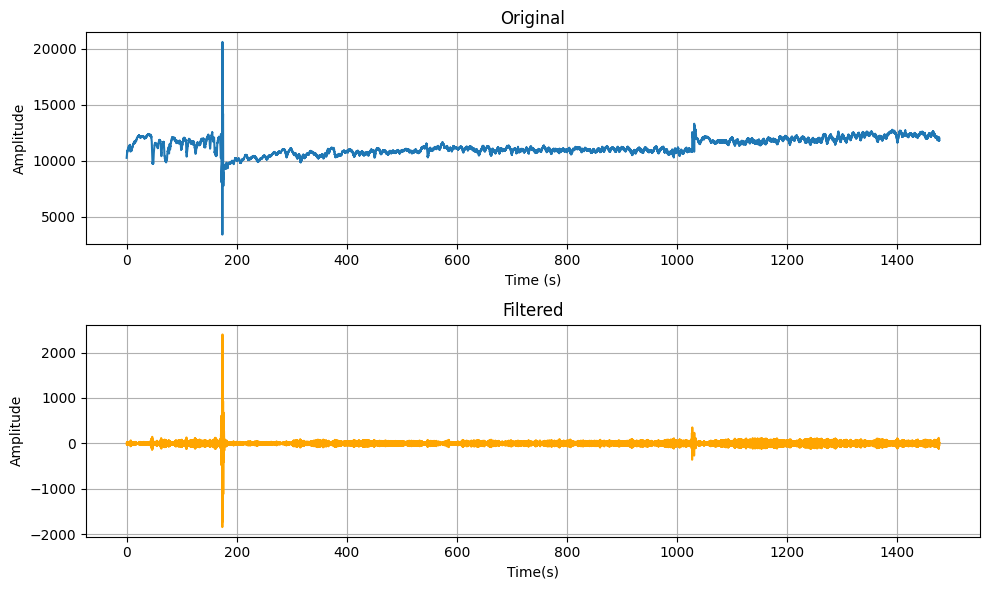

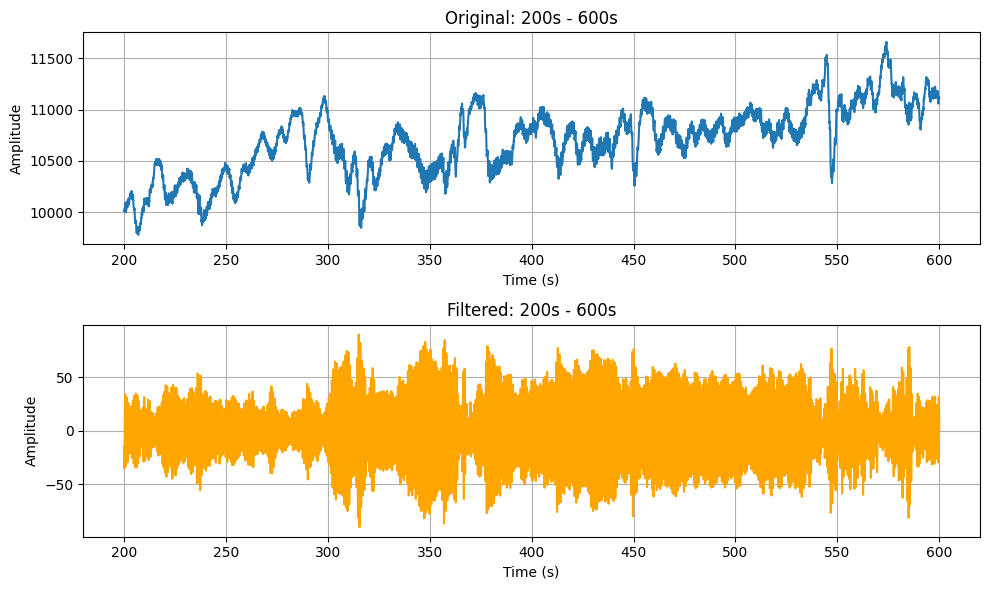

In [12]:

#FILTERED
ppg_signal =df['PG'] 
time_relative =df['TimeRelative_seconds']


# Chebyshev II filter 4th order
order = 4
lowcut = 1  #low cut off
highcut = 2.0  # upper cut off
fs = 25 # sampling rate

#b, a = signal.cheby2(order, 40, [lowcut, highcut], fs=fs, btype='bandpass', analog=False)
b, a = signal.butter(order, [lowcut, highcut], fs=fs, btype='bandpass')

ppg_filtered = signal.filtfilt(b, a, ppg_signal)



plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(time_relative, ppg_signal, label="Original")
plt.title('Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(time_relative, ppg_filtered, label="Filtered", color='orange')
plt.title('Filtered')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

#window size
t1 = 200  
t2 = 600 


window = (time_relative >= t1) & (time_relative <= t2)
time_window = time_relative[window]
ppg_filtered_window = ppg_filtered[window]
ppg_signal_window = ppg_signal[window]
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_window, ppg_signal_window, label="Original")
plt.title(f'Original: {t1}s - {t2}s')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(time_window, ppg_filtered_window, label="Filtered", color='orange')
plt.title(f'Filtered: {t1}s - {t2}s')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
wd, m = hp.process(ppg_filtered, sample_rate = 24, calc_freq=True)


bpm: 82.916509
ibi: 723.619464
sdnn: 80.026138
sdsd: 36.812140
rmssd: 52.961698
pnn20: 0.659297
pnn50: 0.191610
hr_mad: 41.666667
sd1: 37.441694
sd2: 106.685121
s: 12549.002730
sd1/sd2: 0.350955
breathingrate: 0.128507
vlf: 1262.039387
lf: 1553.721192
hf: 703.286954
lf/hf: 2.209228
p_total: 3519.047533
vlf_perc: 35.863096
lf_perc: 44.151753
hf_perc: 19.985151
lf_nu: 68.839858
hf_nu: 31.160142


/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 3000x1500 with 0 Axes>

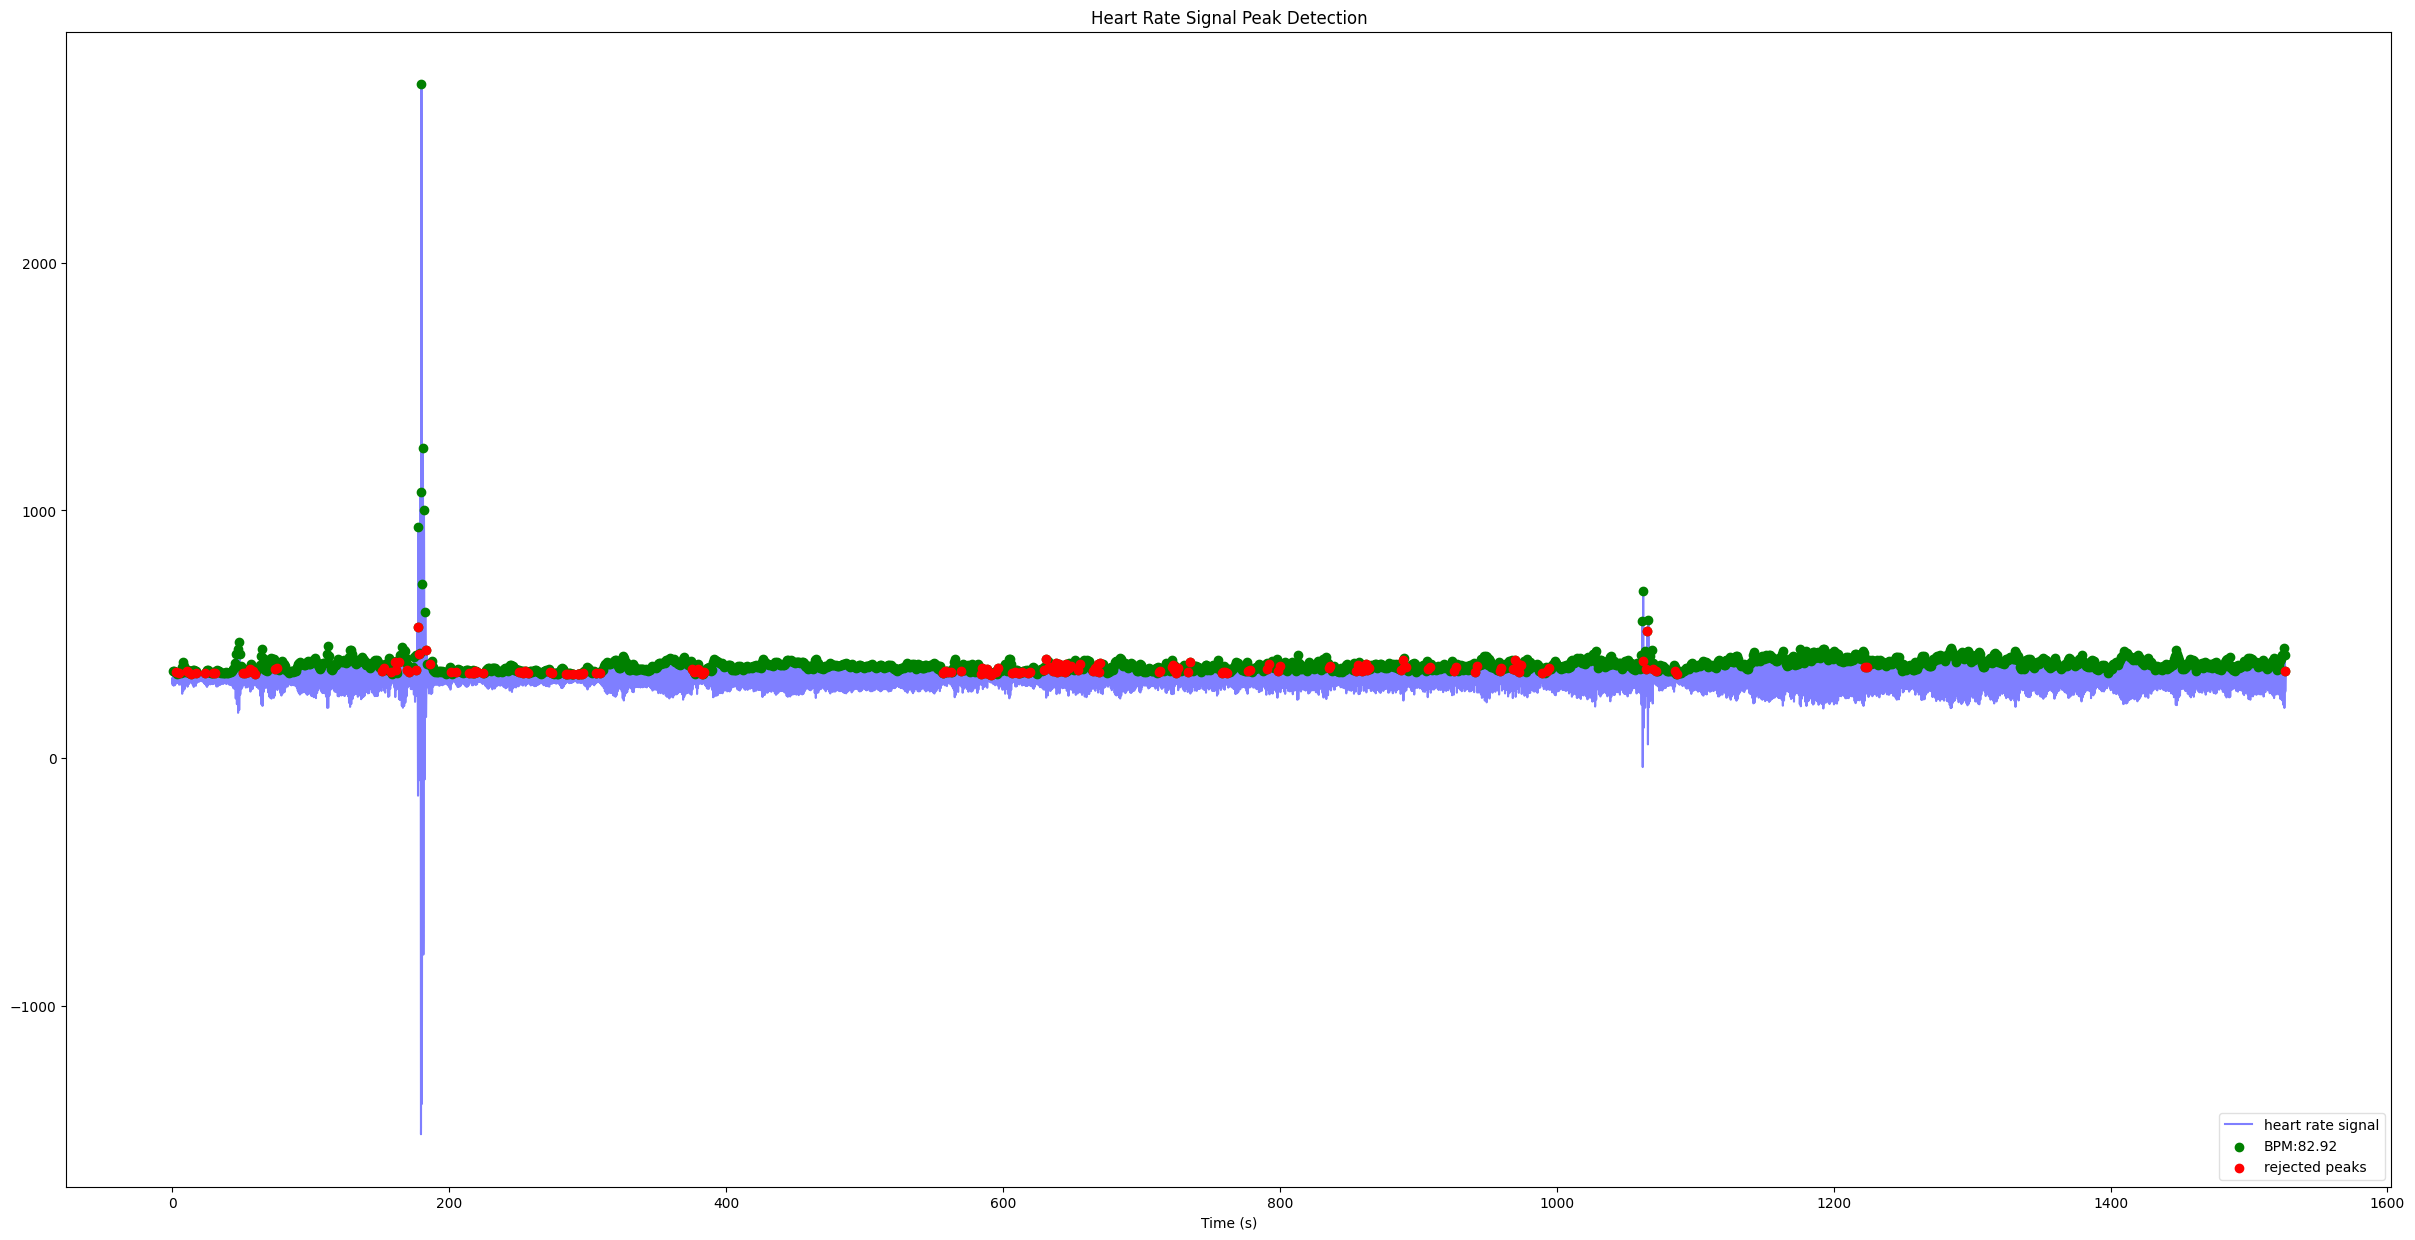

In [14]:
#set large figure
plt.figure(figsize=(30,15))

#call plotter
hp.plotter(wd, m)
plt.gcf().set_size_inches(30, 15)
#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

plt.show()